**Load Dataset**

In [51]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN and convert to appropriate types
data.replace('?', pd.NA, inplace=True)
data = data.dropna()
data = data.astype(float)

# Preview the dataset
print(data.head())
print(data.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     2.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-

**Data Preprocessing**

In [53]:
# Check for missing values
print(data.isnull().sum())
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Exploratory Data Analysis**


---



Heart Disease Distribution

target
0.0    160
1.0     54
2.0     35
3.0     35
4.0     13
Name: count, dtype: int64


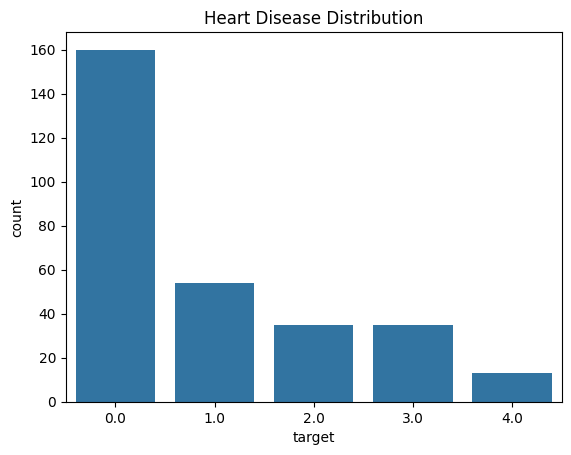

In [54]:
# Checking target distribution
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title('Heart Disease Distribution')
plt.show()

Distributions of Key Numerical Features

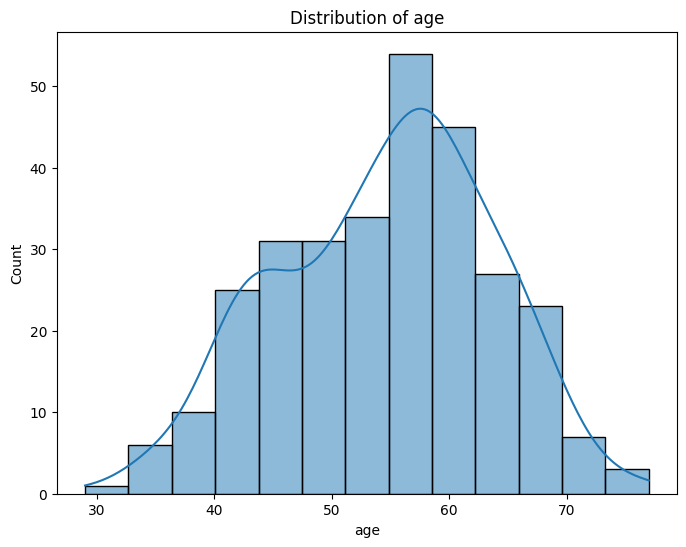

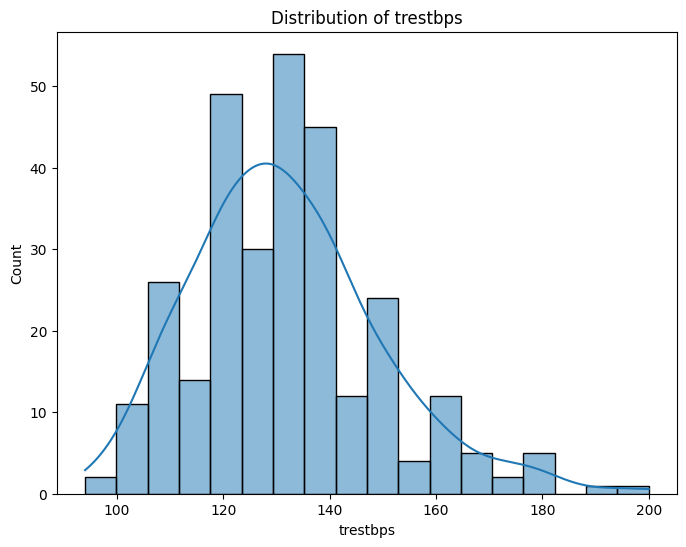

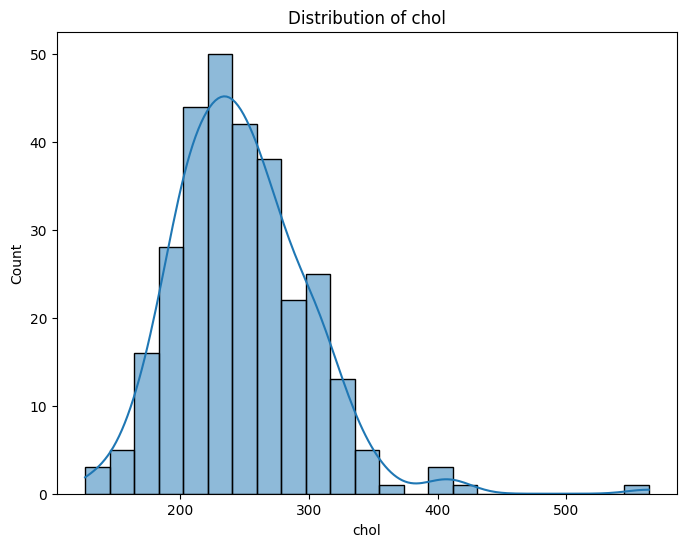

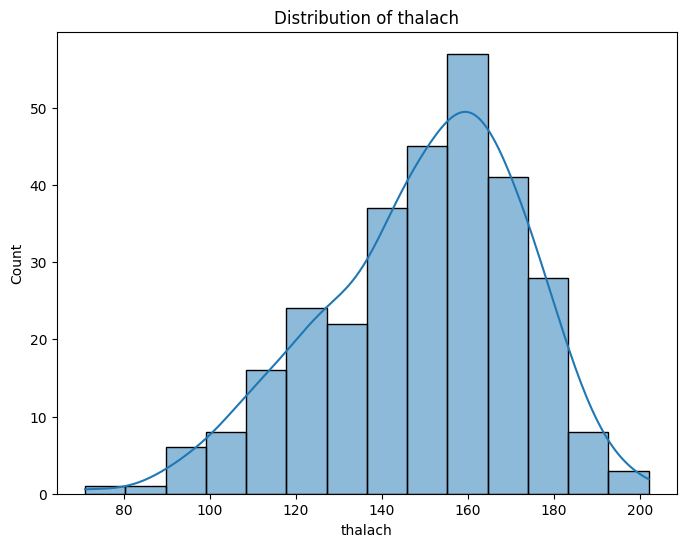

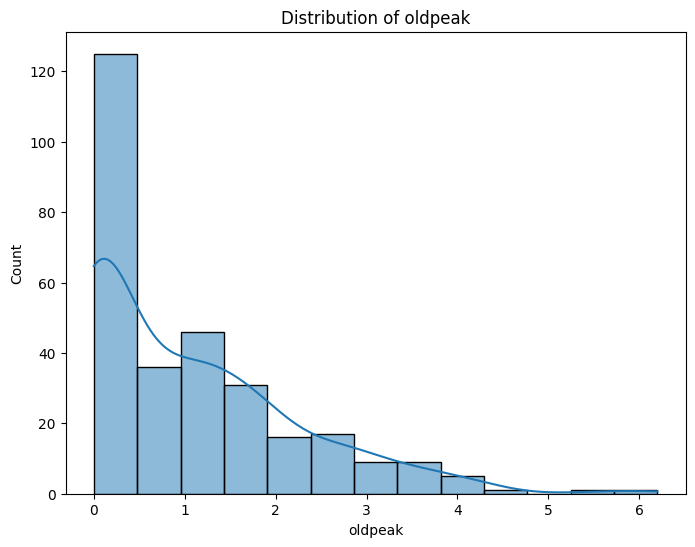

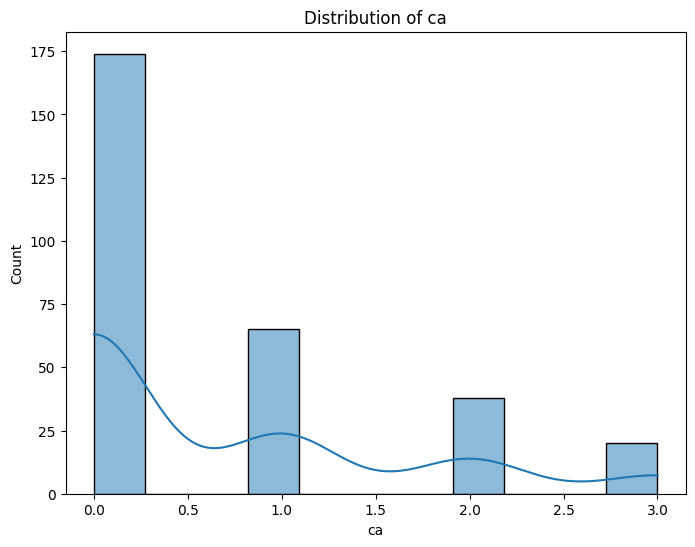

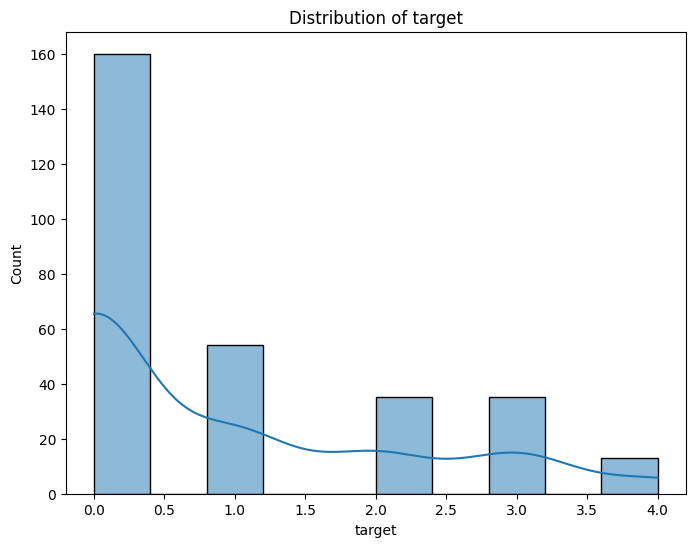

In [55]:
# Visualizing distributions of key numerical features
for column in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Heart Disease by Gender

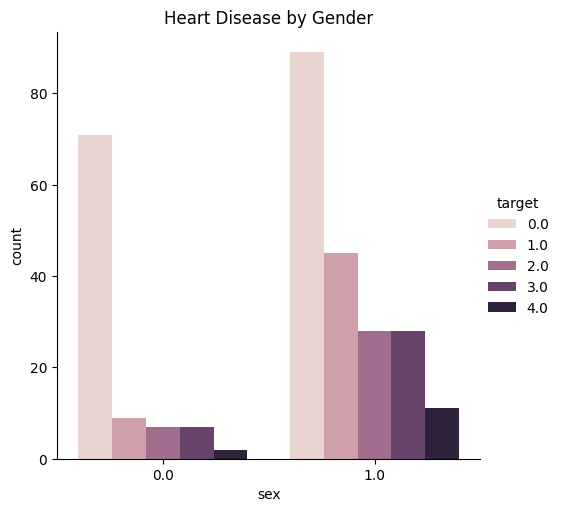

In [56]:
# Visualizing target by key categories
sns.catplot(x="sex", hue="target", kind="count", data=data)
plt.title('Heart Disease by Gender')
plt.show()

Heart Disease by Chest Pain Type

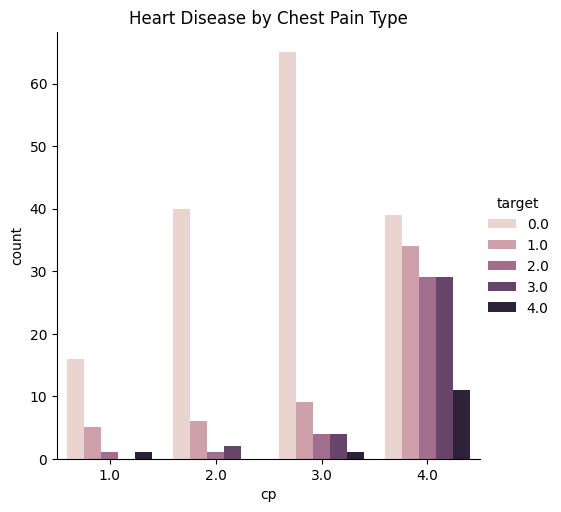

In [57]:
sns.catplot(x="cp", hue="target", kind="count", data=data)
plt.title('Heart Disease by Chest Pain Type')
plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [58]:
# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [59]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = (
        roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        if hasattr(model, 'predict_proba') and y_test.nunique() == 2
        else None
    )
    results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)


Model Performance:
                      Accuracy  ROC AUC
Logistic Regression  0.633333      NaN
Random Forest        0.600000      NaN
Gradient Boosting    0.550000      NaN


Hyperparameter Tuning

In [60]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_s

**Forecasting**


---

Data Preparation

In [61]:
# Ensure new data matches feature columns
future_data = pd.DataFrame({
    'age': [45, 60],
    'sex': [1, 0],
    'cp': [3, 1],
    'trestbps': [120, 140],
    'chol': [230, 260],
    'fbs': [0, 1],
    'restecg': [1, 0],
    'thalach': [150, 120],
    'exang': [0, 1],
    'oldpeak': [0.5, 2.3],
    'slope': [2, 1],
    'ca': [0, 2],
    'thal': [2, 3]
})

Forecasting with the Best Model

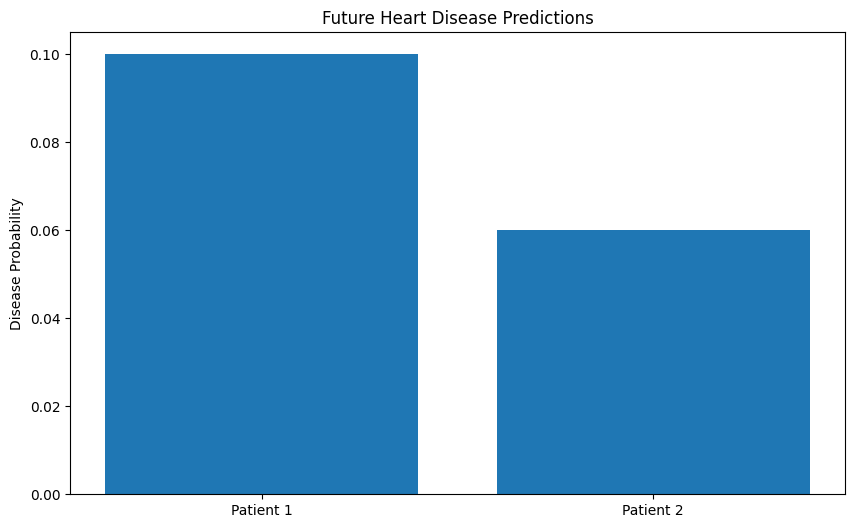

In [62]:
future_predictions = best_model.predict(future_data)
future_probabilities = best_model.predict_proba(future_data)[:, 1]

# Visualize future predictions
plt.figure(figsize=(10, 6))
plt.bar(range(len(future_predictions)), future_probabilities, tick_label=['Patient 1', 'Patient 2'])
plt.title('Future Heart Disease Predictions')
plt.ylabel('Disease Probability')
plt.show()